## 🎯 Objetivo del Análisis

Este notebook tiene como objetivo construir y visualizar un **Índice de Marginación Municipal** en México, utilizando datos del Censo 2020. Se emplean técnicas de reducción de dimensionalidad (PCA) para sintetizar múltiples indicadores sociales y facilitar la comparación entre municipios y entidades.

### Librerías y configuraciones adicionales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import openpyxl
import geopandas as gpd
import matplotlib.pyplot as plt


import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import plotly.express as px

dark_template = pio.templates['plotly_dark'].to_plotly_json()
dark_template['layout']['paper_bgcolor'] = 'rgba(30, 30, 30, 0.5)'
dark_template['layout']['plot_bgcolor'] = 'rgba(30, 30, 30, 0)'
pio.templates['plotly_dark_semi_transparent'] = go.layout.Template(dark_template)
pio.templates.default = 'plotly_dark_semi_transparent'
pd.options.display.max_columns = None
pd.options.display.max_rows = 30

### Lectura de datos

In [2]:
df=pd.read_csv('./conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv')

C:\Users\perez\AppData\Local\Temp\ipykernel_10648\977141348.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('./conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv')


In [3]:
df.head(20)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,64540634,61473390,5764054,2848875,2915179,119976584,61554567,58422017,115693273,59433559,56259714,100528155,51962264,48565891,93985354,48732991,45252363,87492680,45530857,41961823,6462212,3193548,3268664,12986217,6398755,6587462,15287375,7531118,7756257,6542801,3229273,3313528,6492674,3202134,3290540,14736111,7398617,7337494,33885546,15142976,8139094,7003882,95.25,31755284,83663440,10321914,10047365,4969883,5077482,10764379,5311288,5453091,10943540,5389280,5554260,10806690,5344540,5462150,10422095,5256211,5165884,9993001,5131597,4861404,9420827,4893101,4527726,9020276,4688746,4331530,8503586,4441282,4062304,7942413,4130069,3812344,7037532,3705369,3332163,5695958,3002982,2692976,4821062,2563200,2257862,3645077,1938227,1706850,2647340,1413848,1233492,1814582,966684,847898,1175364,651552,523812,1039551,605583,433968,2.09,102724322,52519974,50204348,21611963,11222300,10389663,111075594,57288776,53786818,3807844,1889986,1917858,7364645,3783447,3581198,865972,547528,318444,6423548,3198595,3224953,7177185,785361,6317027,11800247,2576213,1297617,1278596,6179890,2939986,2691338,945162,1350802,1168098,1149257,13934448,4365234,8974853,864662,2900108,673540,26

El análisis que se hará es rescpecto a los municipios, y en nuestros datos ya tenemos una fila que nos da el total de valores por municipio, entonces solo nos quedamos con esas filas.

In [4]:
df_mun=df[df["NOM_LOC"]=="Total del Municipio"]

In [5]:
df_mun.isna().sum().head(10)

ENTIDAD        0
NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
NOM_LOC        0
LONGITUD    2469
LATITUD     2469
ALTITUD     2469
POBTOT         0
dtype: int64

In [6]:
df_mun.isna().any().sum()

np.int64(3)

No tenemos valores nulos, a excepcion de las coordenadas por razones triviales pues es el total del municipio. De igual forma, en los datos del INEGI tendemos a encontrarnos con valores como * y N/D que signifca que los datos no estámn disponibles, así que hacemos la revisión y limpieza de ello.

In [7]:
# Filtrar filas que contienen al menos un '*'
df_con_ast = df_mun[df_mun.applymap(lambda x: x == '*').any(axis=1)]

print("Registros con al menos un *:", df_con_ast.shape)
df_con_ast.head()


Registros con al menos un *: (2469, 286)


C:\Users\perez\AppData\Local\Temp\ipykernel_10648\2666735180.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_con_ast = df_mun[df_mun.applymap(lambda x: x == '*').any(axis=1)]


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
6,1,Aguascalientes,1,Aguascalientes,0,Total del Municipio,NaN,NaN,NaN,948990,486917,462073,44372,21893,22479,903684,464556,439128,871193,448552,422641,756970,392252,364718,707473,368028,339445,657539,343551,313988,48767,23951,24816,97947,48353,49594,114551,56248,58303,49497,24224,25273,49934,24477,25457,120452,60159,60293,260277,102987,56724,46263,94.9,240583,639532,67941,76863,37897,38966,81713,40366,41347,82007,40158,41849,85161,41939,43222,85225,42697,42528,80077,40446,39631,71850,36831,35019,66892,34639,32253,62159,32704,29455,58264,31021,27243,52400,28200,24200,42458,22827,19631,35046,18957,16089,25677,13907,11770,18157,9980,8177,11458,6228,5230,6872,4055,2817,5777,3597,2180,1.98,723960,369304,354656,214908,112801,102107,821875,425161,396714,42481,21032,21449,1839,754,1085,8,4,4,1792,737,1055,1822,8,1776,4050,15170,7560,7610,47525,23117,20047,5894,8636,8226,8618,116705,34873,73664,5980,21547,4413,24523,13945,777394,18639,9130,9509,2877,1360,1517,3907,1671,2236,36490,18550,17940,44885,23031,21854,1851,772,1079,11618,6599,5019,14576,7917,6659,33308,18056,15252,76256,41402,34854,19144,8184,10960,182540,95438,87102,354455,181821,172634,10.84,10.75,10.93,486675,208788,277887,269195,182985,86210,476502,205402,271100,10173,

In [8]:
df_mun["TAMLOC"]=df_mun["TAMLOC"].replace({"*":0})

C:\Users\perez\AppData\Local\Temp\ipykernel_10648\14771664.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mun["TAMLOC"]=df_mun["TAMLOC"].replace({"*":0})
C:\Users\perez\AppData\Local\Temp\ipykernel_10648\14771664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["TAMLOC"]=df_mun["TAMLOC"].replace({"*":0})


In [9]:
df_con = df_mun[df_mun.applymap(lambda x: x == 'N/D').any(axis=1)]

print("Registros con al menos un N/D:", df_con.shape)
df_con.head(30)

Registros con al menos un N/D: (0, 286)


C:\Users\perez\AppData\Local\Temp\ipykernel_10648\3746091739.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_con = df_mun[df_mun.applymap(lambda x: x == 'N/D').any(axis=1)]


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC


Ya sin valores nulos u otros que no sean númericos, transformamos de tipo 

In [10]:
# Columnas que deben quedar como texto/categoría
cols_no_num = ["ENTIDAD","NOM_ENT","MUN","NOM_MUN","LOC","NOM_LOC", "LONGITUD",	"LATITUD",	"ALTITUD"]

for col in df_mun.columns:
    if col not in cols_no_num:
        df_mun[col] = pd.to_numeric(df_mun[col])


C:\Users\perez\AppData\Local\Temp\ipykernel_10648\1200023398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun[col] = pd.to_numeric(df_mun[col])


In [11]:
df_mun.dtypes 

ENTIDAD         int64
NOM_ENT        object
MUN             int64
NOM_MUN        object
LOC             int64
                ...  
VPH_SINRTV      int64
VPH_SINLTC      int64
VPH_SINCINT     int64
VPH_SINTIC      int64
TAMLOC          int64
Length: 286, dtype: object

## 📑 Definición de Indicadores de Marginación

A partir de las variables del Censo 2020, se construyeron los siguientes indicadores para medir la **marginación** en los municipios de México.  
Estos se basan en privaciones en **educación, salud, vivienda, bienes y comunicación, etnicidad/idioma y hacinamiento**.

---

### 📚 Educación
- **p_analfabetismo** = (Población de 15 años y más analfabeta / Población de 15 años y más) × 100  
  → Porcentaje de población adulta que **no sabe leer ni escribir**.  

- **p_sin_escolaridad** = (Población de 15 años y más sin escolaridad / Población de 15 años y más) × 100  
  → Porcentaje de adultos que **nunca asistieron a la escuela**.  
 





### 💻 Bienes 
- **p_sin_TC** =(Viviendas sin línea telefónica fija ni teléfono celular/ Viviendas habitadas) x 100

- **p_sin_TV** =(Viviendas sin TV / Viviendas habitadas) x 100

- **p_sin_INT** = (Viviendas sin internet / Viviendas habitadas) x 100

- **p_sin_bienes** = (Viviendas sin ningún bien / Viviendas habitadas) × 100  
  → Refleja nivel de **carencia material**.  

- **p_sin_tic** = (Viviendas sin computadora ni Internet / Viviendas habitadas) × 100  


*  

Estos servirán como base para aplicar **técnicas de reducción de dimensionalidad (PCA)** y construir un **Índice de Marginación Municipal**.


In [12]:
df_mun["p_analfabetismo"] = df_mun["P15YM_AN"] / df_mun["P_15YMAS"] * 100
df_mun["p_sin_escolaridad"] = df_mun["P15YM_SE"] / df_mun["P_15YMAS"] * 100

df_mun["p_sin_TV"] = df_mun['VPH_SINRTV'] / df_mun["VIVPAR_HAB"] * 100
df_mun["p_sin_TC"] = df_mun['VPH_SINLTC'] / df_mun["VIVPAR_HAB"] * 100
df_mun["p_sin_INT"] = df_mun['VPH_SINCINT'] / df_mun["VIVPAR_HAB"] * 100

df_mun["p_sin_bienes"] = df_mun["VPH_SNBIEN"] / df_mun["VIVPAR_HAB"] * 100
df_mun["p_sin_tic"] = df_mun["VPH_SINTIC"] / df_mun["VIVPAR_HAB"] * 100


vars_marginacion = ["ENTIDAD","NOM_ENT","MUN","NOM_MUN","LOC","NOM_LOC",
    "p_analfabetismo", 'p_sin_escolaridad', 'p_sin_TV', 'p_sin_TC', 'p_sin_INT',
    'p_sin_bienes', 'p_sin_tic'
]   
df_mun1 = df_mun[vars_marginacion].copy()

C:\Users\perez\AppData\Local\Temp\ipykernel_10648\2570664229.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_mun["p_analfabetismo"] = df_mun["P15YM_AN"] / df_mun["P_15YMAS"] * 100
C:\Users\perez\AppData\Local\Temp\ipykernel_10648\2570664229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["p_analfabetismo"] = df_mun["P15YM_AN"] / df_mun["P_15YMAS"] * 100
C:\Users\perez\AppData\Local\Temp\ipykernel_10648\2570664229.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of

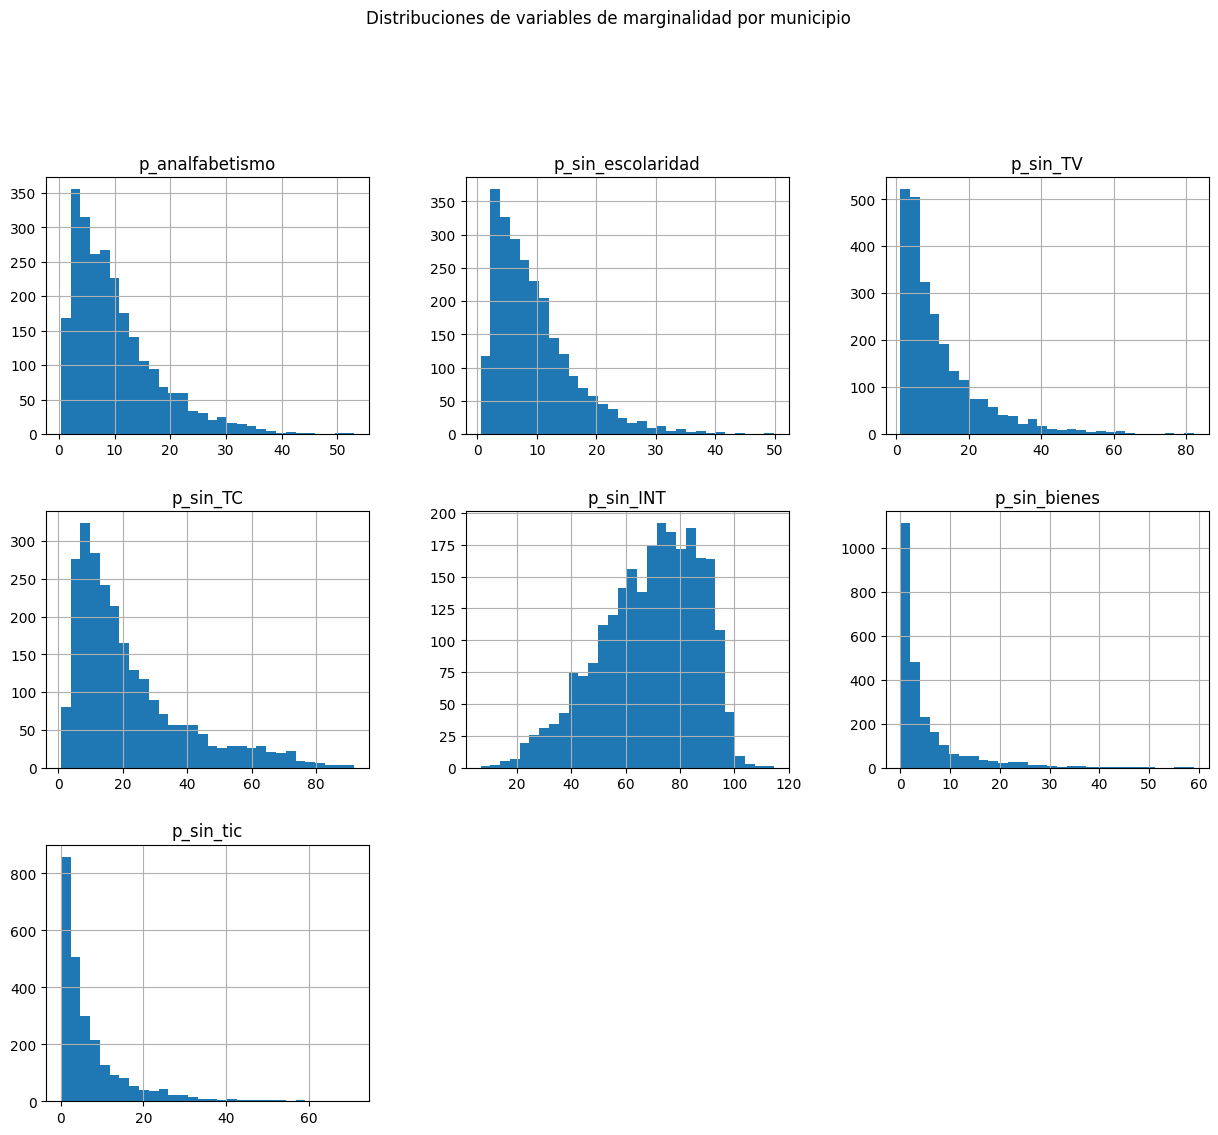

In [13]:
vars_eda = ["p_analfabetismo", 'p_sin_escolaridad', 'p_sin_TV', 'p_sin_TC', 'p_sin_INT',
    'p_sin_bienes', 'p_sin_tic']

df_mun1[vars_eda].hist(bins=30, figsize=(15,12))
plt.suptitle("Distribuciones de variables de marginalidad por municipio", y=1.02)
plt.show()

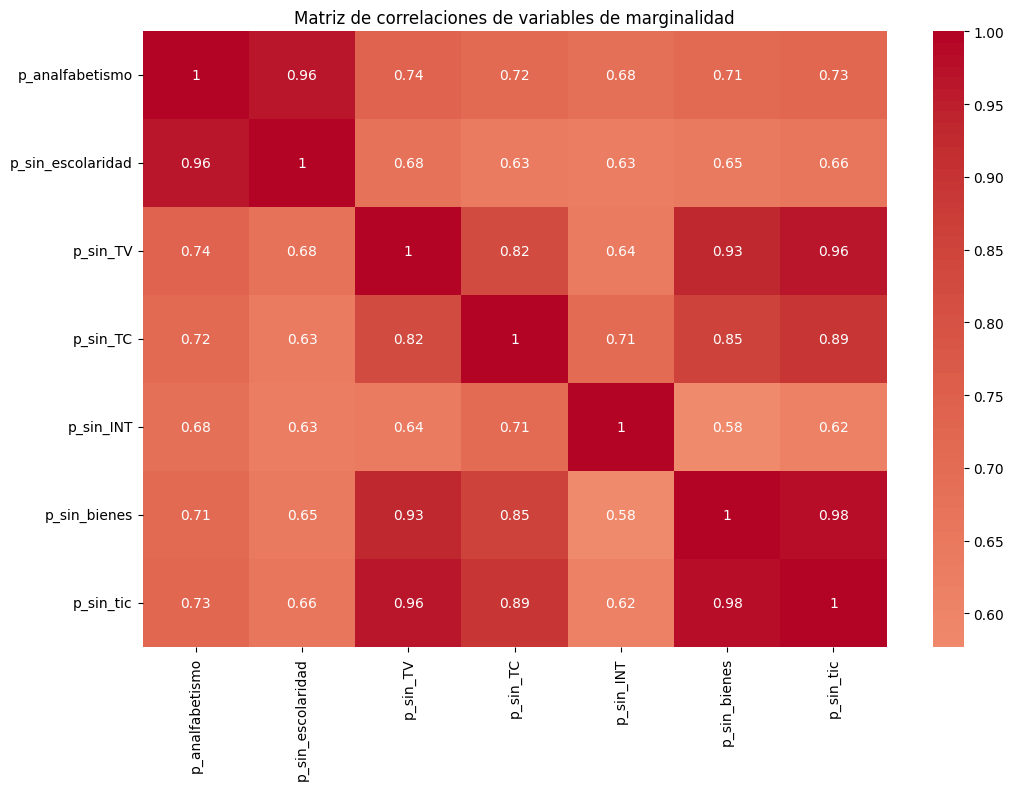

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df_mun[vars_eda].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlaciones de variables de marginalidad")
plt.show()


In [15]:
df_mun1["NOM_ENT"].value_counts().head(20)

NOM_ENT
Oaxaca                             570
Puebla                             217
Veracruz de Ignacio de la Llave    212
Jalisco                            125
México                             125
Chiapas                            124
Michoacán de Ocampo                113
Yucatán                            106
Hidalgo                             84
Guerrero                            81
Sonora                              72
Chihuahua                           67
Tlaxcala                            60
San Luis Potosí                     58
Zacatecas                           58
Nuevo León                          51
Guanajuato                          46
Tamaulipas                          43
Durango                             39
Coahuila de Zaragoza                38
Name: count, dtype: int64

In [16]:
df_mun1["NOM_ENT"].value_counts().tail(20)

NOM_ENT
Tlaxcala                60
San Luis Potosí         58
Zacatecas               58
Nuevo León              51
Guanajuato              46
Tamaulipas              43
Durango                 39
Coahuila de Zaragoza    38
Morelos                 36
Nayarit                 20
Sinaloa                 18
Querétaro               18
Tabasco                 17
Ciudad de México        16
Campeche                12
Aguascalientes          11
Quintana Roo            11
Colima                  10
Baja California          6
Baja California Sur      5
Name: count, dtype: int64

In [17]:
import plotly.express as px
df_mun1['Foco'] = df_mun['NOM_ENT'].apply(
    lambda x: x if x in ['Guerrero','Ciudad de México'] else 'Otros'
)


# ==== 1. EDUCACIÓN ====
fig_edu = px.scatter_matrix(df_mun,
    dimensions=vars_eda,
    color=df_mun1['Foco'],
    title="Scatter Matrix de Indicadores de Marginación por Municipio",
    hover_name="NOM_ENT",
        color_discrete_map={
        "Ciudad de México": "#0AA40A",  # Verde brillante
        "Guerrero": "#c51919",          # Rojo intenso
        "Otros": "#345ae1"              # Azul estándar
    }
)
fig_edu.update_traces(diagonal_visible=False)  
fig_edu.update_layout(width=1400, height=1000)
fig_edu.show()

In [18]:
df_pca = df_mun1[vars_eda].copy()

In [19]:
# Definimos el pipeline
pipe = make_pipeline(
    StandardScaler(),   # 1. Escalamos las variables (media=0, var=1)
    PCA(                # 2. PCA sobre los datos estandarizados
        n_components=None,   # usamos todas las componentes al inicio
        whiten=False,        # mantenemos la escala relativa
        svd_solver='auto',
        random_state=42
    )
)

# Ajustamos el pipeline a los datos
pipe.fit(df_pca)

pca = pipe.named_steps['pca']

# Varianza explicada por cada componente
var_exp = pd.DataFrame(
    data = (pca.explained_variance_ratio_ * 100).round(2),
    columns = ['Varianza (%)'],
    index = [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))]
)

print(var_exp)
print("\nVarianza acumulada (%):")
print(var_exp.cumsum())


     Varianza (%)
PC1         78.95
PC2         10.64
PC3          6.61
PC4          2.43
PC5          0.82
PC6          0.42
PC7          0.12

Varianza acumulada (%):
     Varianza (%)
PC1         78.95
PC2         89.59
PC3         96.20
PC4         98.63
PC5         99.45
PC6         99.87
PC7         99.99


In [20]:
explained_variance = 100 -np.cumsum(pca.explained_variance_ratio_ * 100)

pricipal_components = list(range(1, len(explained_variance) + 1))

# Crea el diagrama de codo utilizando Plotly
trace = go.Scatter(x=pricipal_components, y=explained_variance, mode='lines+markers')
layout = go.Layout(title='Diagrama de Codo',
                     xaxis=dict(title='Número de Componentes Principales'),
                     yaxis=dict(title='Varianza Explicada (%)'),
                     hovermode='closest')

fig = go.Figure(data=[trace], layout=layout)
pio.show(fig)

In [21]:
# El objeto pca tiene la info de componentes
loadings = pd.DataFrame(
    data = pca.components_[0:2, :],   # tomamos PC1 y PC2
    columns = df_pca.columns,  # nombres de las variables originales
    index = ["PC1", "PC2"]
).T

loadings


,PC1,PC2
p_analfabetismo,0.377919,0.465209
p_sin_escolaridad,0.354073,0.559902
p_sin_TV,0.397521,-0.275110
p_sin_TC,0.386440,-0.203497
p_sin_INT,0.327870,0.306338
p_sin_bienes,0.393634,-0.365508
p_sin_tic,0.402496,-0.354337


In [22]:

# Coordenadas de los municipios en PC1 y PC2
components = pipe.transform(df_pca)  
df_comp = pd.DataFrame(components[:, 0:2], columns=["PC1", "PC2"], index=df_mun.index)
df_comp["Entidad"] = df_mun["NOM_ENT"]
df_comp["Municipio"] = df_mun["NOM_MUN"]

# Cargas (loadings) de las variables
loadings = pca.components_.T[:, :2]  # PC1 y PC2
vars_names = df_pca.columns

# Gráfico base con municipios
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_comp["PC1"], y=df_comp["PC2"],
    mode="markers",
    marker=dict(color="blue", size=4, opacity=0.6),
    text=df_comp["Municipio"],
    hoverinfo="text",
    name="Municipios"
))

# Agregar flechas de variables
for i, var in enumerate(vars_names):
    fig.add_trace(go.Scatter(
        x=[0, loadings[i, 0]*5], # Escalamos las flechas para mejor visibilidad
        y=[0, loadings[i, 1]*5],
        mode="lines+markers+text",
        line=dict(color="orange", width=2),
        marker=dict(size=2),
        text=[None, var],
        textposition="top center",
        name=var,
        showlegend=False
    ))

fig.update_layout(
    title="Biplot PCA (PC1 vs PC2)",
    xaxis_title="PC1",
    yaxis_title="PC2",
    width=900, height=700
)
fig.show()


In [23]:

df_pca = pd.DataFrame(components, 
                      columns=[f'PC{i+1}' for i in range(components.shape[1])],
                      index=df_mun.index)

# Tomamos solo PC1 como índice de marginación
df_mun1["indice_marginacion"] = df_pca["PC1"]

scaler = MinMaxScaler()
df_mun1["indice_marginacion_norm"] = scaler.fit_transform(
    df_mun1[["indice_marginacion"]]
)


df_mun1


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,p_analfabetismo,p_sin_escolaridad,p_sin_TV,p_sin_TC,p_sin_INT,p_sin_bienes,p_sin_tic,Foco,indice_marginacion,indice_marginacion_norm
6,1,Aguascalientes,1,Aguascalientes,0,Total del Municipio,1.642183,2.060291,1.280076,2.829826,28.801524,0.147447,0.283642,Otros,-2.922118,0.032803
574,1,Aguascalientes,2,Asientos,0,Total del Municipio,3.523404,3.469504,3.008779,11.548284,57.509976,0.814046,1.412610,Otros,-1.898689,0.089596
749,1,Aguascalientes,3,Calvillo,0,Total del Municipio,4.487288,5.094590,2.865089,5.846592,52.134265,0.446255,0.892511,Otros,-2.035360,0.082011
918,1,Aguascalientes,4,Cosío,0,Total del Municipio,3.139545,3.029534,3.534198,10.526316,48.614289,0.635647,1.271294,Otros,-2.119434,0.077346
985,1,Aguascalientes,5,Jesús María,0,Total del Municipio,2.377387,2.834282,1.487588,3.564013,35.475873,0.260328,0.458673,Otros,-2.687691,0.045812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195372,32,Zacatecas,54,Villa Hidalgo,0,Total del Municipio,7.489290,7.978886,3.317437,15.426083,73.999585,0.622019,1.658719,Otros,-1.069421,0.135614
195422,32,Zacatecas,55,Villanueva,0,Total del Municipio,4.196878,3.987887,3.399622,8.287968,47.239196,0.377736,1.122098,Otros,-2.115422,0.077569
195542,32,Zacatecas,56,Zacatecas,0,Total del Municipio,1.437077,2.102084,1.647634,2.867028,21.249879,0.174199,0.312107,Otros,-3.048608,0.025783
195616,32,Zacatecas,57,Trancoso,0,Total del Municipio,5.116885,5.384671,2.915452,15.182776,73.424535,0.672797,1.323167,Otros,-1.367021,0.119100


In [24]:
col_mar=['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'indice_marginacion_norm']
df_marginacion=df_mun1[col_mar].copy()
df_marginacion

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,indice_marginacion_norm
6,1,Aguascalientes,1,Aguascalientes,0.032803
574,1,Aguascalientes,2,Asientos,0.089596
749,1,Aguascalientes,3,Calvillo,0.082011
918,1,Aguascalientes,4,Cosío,0.077346
985,1,Aguascalientes,5,Jesús María,0.045812
...,...,...,...,...,...
195372,32,Zacatecas,54,Villa Hidalgo,0.135614
195422,32,Zacatecas,55,Villanueva,0.077569
195542,32,Zacatecas,56,Zacatecas,0.025783
195616,32,Zacatecas,57,Trancoso,0.119100


C:\Users\perez\AppData\Local\Temp\ipykernel_10648\1403994342.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




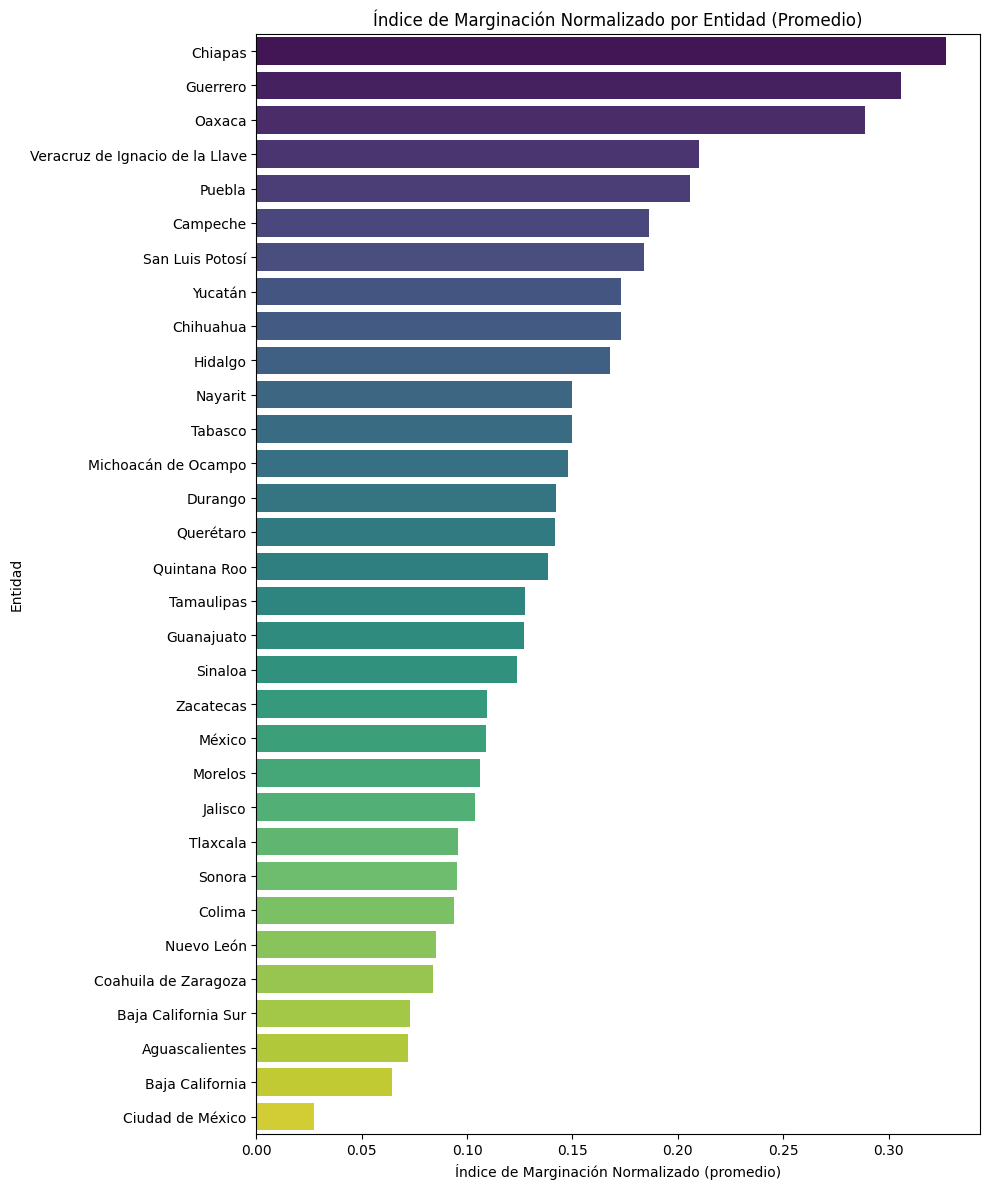

In [25]:
# Agrupar por entidad y calcular el promedio del índice de marginación normalizado
df_entidad = df_marginacion.groupby('NOM_ENT', as_index=False)['indice_marginacion_norm'].mean()

# Ordenar de mayor a menor
df_entidad = df_entidad.sort_values('indice_marginacion_norm', ascending=False)

# Graficar
plt.figure(figsize=(10, 12))
sns.barplot(
    data=df_entidad,
    y='NOM_ENT',
    x='indice_marginacion_norm',
    palette='viridis'
)
plt.xlabel('Índice de Marginación Normalizado (promedio)')
plt.ylabel('Entidad')
plt.title('Índice de Marginación Normalizado por Entidad (Promedio)')
plt.tight_layout()
plt.show()

In [26]:

df_marginacion.to_excel('indice_marginacion_municipal.xlsx', index=False, engine='openpyxl')


wb = openpyxl.load_workbook('indice_marginacion_municipal.xlsx')
ws = wb.active

# Revisar las primeras filas de la columna NOM_MUN y NOM_ENT
for row in ws.iter_rows(min_row=2, max_row=6, values_only=True):
    print("Entidad:", row[1], "| Municipio:", row[3])

Entidad: Aguascalientes | Municipio: Aguascalientes
Entidad: Aguascalientes | Municipio: Asientos
Entidad: Aguascalientes | Municipio: Calvillo
Entidad: Aguascalientes | Municipio: Cosío
Entidad: Aguascalientes | Municipio: Jesús María


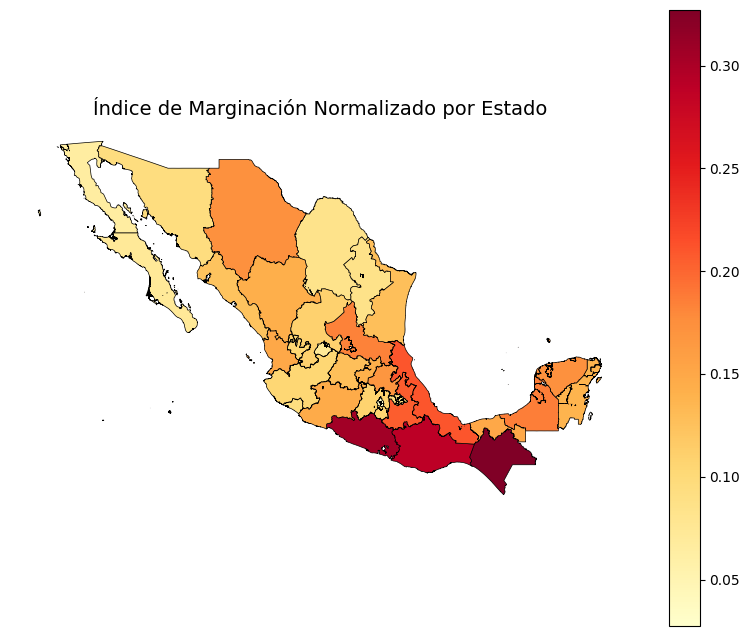

In [ ]:
df = df_marginacion.copy()

# Leer shapefile
shapefile_path = "./conjunto_de_datos/00mun.shp"
mun = gpd.read_file(shapefile_path)

# Asegurar tipos
mun["CVE_ENT"] = mun["CVE_ENT"].astype(int)
mun["CVE_MUN"] = mun["CVE_MUN"].astype(int)
df["ENTIDAD"] = df["ENTIDAD"].astype(int)
df["MUN"] = df["MUN"].astype(int)

# Merge
gdf = mun.merge(df, left_on=["CVE_ENT", "CVE_MUN"], right_on=["ENTIDAD", "MUN"])

# Convertir a WGS84
gdf = gdf.to_crs(epsg=4326)

# Disolver por estado
gdf_estados = gdf.dissolve(
    by="ENTIDAD",
    aggfunc={"indice_marginacion_norm": "mean", "NOM_ENT": "first"}
).reset_index()

# Crear figura
fig, ax = plt.subplots(figsize=(10, 8))

# Mapa coroplético
gdf_estados.plot(
    column="indice_marginacion_norm",
    cmap="YlOrRd",
    linewidth=0.5,
    ax=ax,
    edgecolor="black",
    legend=True,
)

# Título
plt.title("Índice de Marginación Normalizado por Estado", fontsize=14)

# Eliminar ejes
ax.set_axis_off()


plt.savefig("mapa_marginacion_estatico.png", dpi=150, bbox_inches="tight")


plt.show()
